# **PHASE 3 PROJECT.**


## **CUSTOMER CHURN PREDICTION FOR SYRIATEL: LEVERAGING PREDICTIVE ANALYTICS TO RETAIN CUSTOMERS**

---

### **OVERVIEW.**

Customer churn is a significant challenge in the telecommunications industry, where companies like SyriaTel face financial losses due to customers discontinuing their services. This project focuses on developing a binary classification model to predict whether a customer is likely to churn. The insights derived from this model will empower SyriaTel to proactively identify at-risk customers, implement targeted retention strategies, reduce churn rates, and improve long-term revenue.

---

### **BUSINESS UNDERSTANDING.**

#### **Objective.**

SyriaTel is experiencing revenue losses due to customer attrition. Retaining existing customers is more cost-effective than acquiring new ones. The primary objective of this project is to develop a binary classification model to predict customer churn. The model will allow SyriaTel to:  
1. Identify customers at risk of churning early.  
2. Design and implement targeted retention strategies, such as personalized offers or loyalty programs.  
3. Enhance customer satisfaction and loyalty.  
4. Minimize revenue losses caused by churn.  

#### **Key Business Questions.**  
1. What are the main factors influencing customer churn?  
2. How can these factors be leveraged to design effective retention strategies?  
3. How accurately can the model predict customer churn, enabling timely interventions?  

---

### **DATA UNDERSTANDING.**

#### **Dataset Overview.**  
The dataset, sourced from Kaggle, contains historical information on SyriaTel customers, covering demographics, usage patterns, account details, support interactions and churn status.

The dataset consists of 20 columns and 3333 rows. 
Key components include:

1. **Target Variable**:  
   - **Churn**: A binary variable indicating whether a customer has churned (1) or not (0).  

2. **Predictor Variables**:  
- **customer_demographics** = ['account length']
service_usage_metrics = ['total day minutes', 'total day calls', 'total day charge',
        'total eve minutes', 'total eve calls', 'total eve charge',
        'total night minutes', 'total night calls', 'total night charge',
        'total intl minutes', 'total intl calls', 'total intl charge']
- **account_information** = ['area code', 'phone number', 'international plan', 
        'voice mail plan', 'number vmail messages']
- **customer_support_interactions** = ['customer service calls']

#### **Initial Observations.**  
- **Class imbalance**: Fewer churn cases compared to non-churn cases, requiring techniques like class weighting or resampling during modeling.  
- **Mixed data types**: Numerical and categorical features require preprocessing for compatibility with machine learning models.  
- **No missing values detected**, but potential outliers exist in numerical features.  

#### **Key Questions for Analysis**  
- Are specific usage patterns (e.g., high international call charges) strongly correlated with churn?  
- How do categorical variables like the presence of an international plan or a voicemail plan influence churn?  
- What role do customer service interactions play in churn prediction?  


### **DATA PREPARATION.**

#### **Objective.**  
To ensure the dataset is clean, transformed, and ready for modeling by addressing quality issues and engineering relevant features to ensure compatibility with the chosen models and improve prediction accuracy.


1. **Data Cleaning**:  
   - Handle missing numerical values with imputation (none detected in this dataset).  
   - Fill missing categorical values (if present) with `'Unknown'`.  
   - Remove duplicate records to avoid bias.  

2. **Outlier Treatment**:  
   - Detect outliers using the Interquartile Range (IQR) and box plots.  
   - Apply capping or winsorization to handle extreme values.  

3. **Feature Transformation**:  
   - Standardize numerical features using a `StandardScaler` for models sensitive to scale.  
   - Encode categorical variables using binary encoding.  

4. **Feature Engineering**:  
   - Create new features like:  
     - **Total call duration**: Sum of day, evening, and night call durations.  
     - **Average call duration per day**: Total call duration divided by the number of days in the account length.  
     - **Customer service call frequency**: Number of calls normalized by account length.  

5. **Class Imbalance Handling**:  
   
   - Adjusting class weights or winsorization.  
     

6. **Data Splitting**:  
   - Split the dataset into training (75%) and test (25%) subsets for evaluation.  

---

### **MODELING.**

#### **Objective.**  
Develop and compare machine learning models to predict customer churn, starting with a base model and progressing to more advanced techniques.

1. **Model Selection**:  
   - **Baseline Model**: Logistic Regression for simplicity and interpretability.  
   - **Advanced Models**: Decision Tree and Random Forest to capture non-linear patterns and improve accuracy.  

2. **Model Training**:  
   - Train each model on the training dataset.  
   - Apply cross-validation to tune hyperparameters and avoid overfitting.  


3. **Evaluation Metrics**:  
   - **Primary Metric**: Accuracy to assess overall performance.  
   - **Complementary Metrics**: Precision, recall, F1-score, and ROC-AUC to provide a comprehensive evaluation, particularly for handling class imbalance.  

---

### **EVALUATION.**

#### **Objective.**  
To assess the model’s performance and ensure it meets business requirements.  

1. **Evaluate Test Set Performance**:  
   - Measure accuracy, precision, recall, F1-score, and ROC-AUC.  
   - Compare test performance with cross-validation results to check for overfitting or underfitting.  

2. **Feature Importance Analysis**:  
   - For Logistic Regression, analyze feature coefficients to interpret their impact.  
   - For Decision Tree and Random Forest, extract feature importance scores to identify key predictors.  

3. **Model Comparison**:  
   - Compare the performance of all models to identify the best-performing one.  
   - Random Forest is expected to outperform in terms of accuracy and AUC.  

4. **Business Impact Analysis**:  
   - Use model insights to identify at-risk customers for retention campaigns.  
   - Quantify potential cost savings from reduced churn rates.  

5. **Final Model Deployment**:  
   - Deploy the best-performing model (Random Forest) in a production environment.  
   - Monitor model performance over time and retrain as needed.  



## **1. Import the necessary libraries.**

In [240]:
import pandas as pd 
import numpy as np 
import pickle, sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from numbers import Number
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


 ## **2. Loading and reading the CSV file/dataset.**


In [241]:
df = pd.read_csv("Syriatel Customer Churn.csv", index_col=0)

In [242]:
#Displaying the first few rows of the  data set.
df.head()
# To get a summary of the  data set.
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, KS to TN
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   float6

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


## **3. Inspecting and understanding our data.**

In [243]:
#Displaying the first few rows of the  data set.
df.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [244]:
#To display our last five rows of the data set.
df.tail()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
TN,74,415,400-4344,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [245]:
#To display the columns of the data set.
df.columns

Index(['account length', 'area code', 'phone number', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [246]:
#To check the shape of the data set.
rows=df.shape[0]
columns=df.shape[1]
print(f"Customer churn data set has {rows} rows and {columns} columns")

Customer churn data set has 3333 rows and 20 columns


In [247]:
#To check the descriptive statistics for the columns of the data set.
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Determine the data type of the columns in the data set.

In [248]:
# Check for all the numerical columns 
numerical_columns = df.select_dtypes(include=['number']).columns
print(f"The numerical columns include: {numerical_columns}")

The numerical columns include: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')


In [249]:
# Check for the categorical columns.
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(f"The categorical columns include: {categorical_columns}")

The categorical columns include: Index(['phone number', 'international plan', 'voice mail plan'], dtype='object')


In [250]:
# Check the data type of the 'churn' column
data_type = df['churn'].dtype
print(f"The data type of the 'churn' column is: {data_type}")


The data type of the 'churn' column is: bool


In [251]:
print(df['churn'].value_counts())

churn
False    2850
True      483
Name: count, dtype: int64


Defining the target variables and the predictor variables / features

In [252]:
# Defining the target variable.
target = df['churn']

In [253]:
# Defining the predictor variables/features inorder to isolate the predictor variables used to train the model.
features = df.drop(columns=['churn'])

In [254]:
# Sub-categorizing features to enable focused analysis and testing of specific feature groups.
customer_demographics = ['account length']
service_usage_metrics = ['total day minutes', 'total day calls', 'total day charge',
        'total eve minutes', 'total eve calls', 'total eve charge',
        'total night minutes', 'total night calls', 'total night charge',
        'total intl minutes', 'total intl calls', 'total intl charge']
account_information = ['area code', 'phone number', 'international plan', 
        'voice mail plan', 'number vmail messages']
customer_support_interactions = ['customer service calls']

In [255]:
# Dictionary to hold/store the categorized features for easy access and organization and to provide a structured way to manage and reference different groups of features during analysis or model tuning.
feature_categories = {
    'Customer Demographics': customer_demographics,
    'Service Usage Metrics': service_usage_metrics,
    'Account Information': account_information,
    'Customer Support Interactions': customer_support_interactions
}

In [256]:
# Dictionary to hold categorized features
feature_categories = {
    'Customer Demographics': customer_demographics,
    'Service Usage Metrics': service_usage_metrics,
    'Account Information': account_information,
    'Customer Support Interactions': customer_support_interactions
}

# Example: Display the feature categories
for category, columns in feature_categories.items():
    print(f"{category}: {columns}")

# Output feature and target variable structure
print(f"Target Variable: {target.name}")
print(f"Predictor Variables: {features.columns.tolist()}")

Customer Demographics: ['account length']
Service Usage Metrics: ['total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge']
Account Information: ['area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages']
Customer Support Interactions: ['customer service calls']
Target Variable: churn
Predictor Variables: ['account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


In [257]:
# Displaying Categories: Printing each feature category and its corresponding columns for verification.
for category, columns in feature_categories.items():
    print(f"{category}: {columns}")

Customer Demographics: ['account length']
Service Usage Metrics: ['total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge']
Account Information: ['area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages']
Customer Support Interactions: ['customer service calls']


In [258]:
# Displaying/printing Target and Predictor Information inorder to ensure the churn column is correctly isolated as the target, and all the other columns are included as predictors.
print(f"Target Variable: {target.name}")
print(f"Predictor Variables: {features.columns.tolist()}")

Target Variable: churn
Predictor Variables: ['account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


## 4. Data Cleaning
### 4.1 Missing Values
First we will check for the missing values, then we will sort out for any missing values.

In [259]:
# Checking for missing values.
missing_df=df.isnull().sum()
print(type(missing_df))
print(missing_df)

<class 'pandas.core.series.Series'>
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


We can see that there are no missing values in the data set so we will proceed with the next step of data cleaning.

### 4.2 Check for duplicates. 

In [260]:
# First we will check if there are duplicates.
# Check for duplicates in the entire dataset
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


Since there are no duplicates we will continue to the next step of data cleaning.

### 4.3 Checking for outliers and handling the outliers in the numerical columns.

* Check for outliers using the following methods:Visualizations (box plots) or the IQR method.
* Then treat outliers through: cap, remove, or adjust.

Check for outliers in all numerical columns using the IQR(Interquartile Range).

In [261]:
# List of numerical columns in the dataset
numerical_columns = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 
                     'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 
                     'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 
                     'total intl calls', 'total intl charge', 'customer service calls']

# Defining a function to check and count outliers using the IQR method
def check_outliers_iqr(df, numerical_columns):
    outliers_count = {}
    for column in numerical_columns:
        # Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify and count outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_count[column] = len(outliers)  # Store outliers count for each column
    
    return outliers_count

# Get the count of outliers in each numerical column
outliers_count = check_outliers_iqr(df, numerical_columns)

# Print the outliers count for each column
for column, count in outliers_count.items():
    print(f"Outliers in '{column}': {count}")

Outliers in 'account length': 18
Outliers in 'number vmail messages': 1
Outliers in 'total day minutes': 25
Outliers in 'total day calls': 23
Outliers in 'total day charge': 25
Outliers in 'total eve minutes': 24
Outliers in 'total eve calls': 20
Outliers in 'total eve charge': 24
Outliers in 'total night minutes': 30
Outliers in 'total night calls': 22
Outliers in 'total night charge': 30
Outliers in 'total intl minutes': 46
Outliers in 'total intl calls': 78
Outliers in 'total intl charge': 49
Outliers in 'customer service calls': 267


Visualise the outliers in order to visualize the distribution of data with box plots for each numerical feature to confirm the outliers visually.

Handling the outliers in the numerical columns using capping or winsorization.

In [262]:
# Defining a function to cap the outliers.

def cap_outliers(df, columns, lower_percentile=0.01, upper_percentile=0.99):
    for col in columns:
        lower_cap = df[col].quantile(lower_percentile)  # 1st percentile
        upper_cap = df[col].quantile(upper_percentile)  # 99th percentile
        df[col] = df[col].clip(lower=lower_cap, upper=upper_cap)
    return df

# List of features to apply capping
columns_to_cap = [
    "account length", "number vmail messages", "total day minutes",
    "total day calls", "total day charge", "total eve minutes",
    "total eve calls", "total eve charge", "total night minutes",
    "total night calls", "total night charge", "total intl minutes",
    "total intl calls", "total intl charge", "customer service calls"
]

# Apply capping
df = cap_outliers(df, columns_to_cap)

# Check if capping was applied successfully
print(df[columns_to_cap].describe(percentiles=[0.01, 0.99]))


       account length  number vmail messages  total day minutes  \
count     3333.000000            3333.000000        3333.000000   
mean       100.981362               8.074707         179.792499   
std         39.276205              13.622222          53.535083   
min         12.320000               0.000000          51.832000   
1%          12.537600               0.000000          51.853760   
50%        101.000000               0.000000         179.400000   
99%        195.000000              43.000000         305.146240   
max        195.000000              43.000000         305.168000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.482748         30.565254         201.000852       100.129913   
std          19.628346          9.100850          49.821440        19.546408   
min          54.000000          8.813200          79.524000        53.000000

### 4.4 Checking for inconsistency and unique values in the categorical columns, standardizing the rare values, handling the rare categories.

Check for inconsistent categories in the categorical column inorder to standardize the categorical labels.

In [263]:
# List of the categorical columns in the dataset
categorical_columns = ['phone number', 'international plan', 'voice mail plan']

# Check the Unique Values using for loops in order to identify inconsistencies or unusual categories in the dataset.
for column in categorical_columns:
    print(f"Unique values in '{column}':\n{df[column].unique()}\n")

Unique values in 'phone number':
['382-4657' '371-7191' '358-1921' ... '328-8230' '364-6381' '400-4344']

Unique values in 'international plan':
['no' 'yes']

Unique values in 'voice mail plan':
['yes' 'no']



In [264]:
# Standardizing Values which  strip spaces, convert to lowercase for 'international plan' and 'voice mail plan' for uniformity
df['international plan'] = df['international plan'].str.strip().str.lower()
df['voice mail plan'] = df['voice mail plan'].str.strip().str.lower()

# Then re-check unique values after standardization
for column in ['international plan', 'voice mail plan']:
    print(f"Unique values after standardization in '{column}':\n{df[column].unique()}\n")

Unique values after standardization in 'international plan':
['no' 'yes']

Unique values after standardization in 'voice mail plan':
['yes' 'no']



In [265]:
# 3. Handling Rare Categories.
# Check frequency distribution and handle rare values for 'international plan' and 'voice mail plan'
for column in ['international plan', 'voice mail plan']:
    print(f"Value counts in '{column}':\n{df[column].value_counts()}\n")
    # Example threshold: Categories with less than 5 occurrences
    category_counts = df[column].value_counts()
    rare_categories = category_counts[category_counts < 5].index
    df[column] = df[column].replace(rare_categories, 'other')

    # Re-check unique values after handling rare categories
    print(f"Unique values in '{column}' after handling rare categories:\n{df[column].unique()}\n")

# NB: The column 'phone number' might not need encoding or processing as it's a unique identifier.

Value counts in 'international plan':
international plan
no     3010
yes     323
Name: count, dtype: int64

Unique values in 'international plan' after handling rare categories:
['no' 'yes']

Value counts in 'voice mail plan':
voice mail plan
no     2411
yes     922
Name: count, dtype: int64

Unique values in 'voice mail plan' after handling rare categories:
['yes' 'no']



### 4.5 Dropping unnecessary columns.

In [266]:
#Drop the column phone number as it is a unique identifier and it is not encoded so as to ensure all the other columns are in the correct for modeling purposes and it is also an unnecessary column.
df = df.drop(columns=['phone number'], errors='ignore')

In [267]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,
KS,128.0,415,no,yes,25,265.1,110,45.07,197.400,99,16.7800,244.7,91.0,11.01,10.0,3,2.70,1,False
OH,107.0,415,no,yes,26,161.6,123,27.47,195.500,103,16.6200,254.4,103.0,11.45,13.7,3,3.70,1,False
NJ,137.0,415,no,no,0,243.4,114,41.38,121.200,110,10.3000,162.6,104.0,7.32,12.2,5,3.29,0,False
OH,84.0,408,yes,no,0,299.4,71,50.90,79.524,88,6.7592,196.9,89.0,8.86,6.6,7,1.78,2,False
OK,75.0,415,yes,no,0,166.7,113,28.34,148.300,122,12.6100,186.9,121.0,8.41,10.1,3,2.73,3,False


In [268]:
df.tail()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,
AZ,192.0,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83.0,12.56,9.9,6,2.67,2,False
WV,68.0,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123.0,8.61,9.6,4,2.59,3,False
RI,28.0,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91.0,8.64,14.1,6,3.81,2,False
CT,184.0,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137.0,6.26,5.0,10,1.35,2,False
TN,74.0,415,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77.0,10.86,13.7,4,3.70,0,False


## **5.Data transformation.**

### 5.1 Converting the data type of the target variable to binary.
Convert the data type of the target variable from boolean to binary which is numerical to ensure it is in the correct format  and model compatibility since machine learning models require the target variable to be numeric.

In [269]:
# Convert boolean to binary
df['churn'] = df['churn'].astype(int)

# Confirm the transformation
print(df['churn'].unique()) 

[0 1]


### 5.2 Encode the categorical variables.
Encoding: Maps standardized values into numerical representation.

In [270]:
# Binary encoding for 'international plan' and 'voice mail plan'
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0, 'other': -1})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0, 'other': -1})

# Re-check final encoded values
print(f"Final encoded values for 'international plan':\n{df['international plan'].unique()}\n")
print(f"Final encoded values for 'voice mail plan':\n{df['voice mail plan'].unique()}\n")

# Verify the final changes
print(df[['international plan', 'voice mail plan']].head())

Final encoded values for 'international plan':
[0 1]

Final encoded values for 'voice mail plan':
[1 0]

       international plan  voice mail plan
state                                     
KS                      0                1
OH                      0                1
NJ                      0                0
OH                      1                0
OK                      1                0


### 5.3 Scale numerical features.
To standardize them especially for models that are sensitive to the scale of features like logistic regression.

In [271]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns for scaling
numerical_columns = ['account length', 'total day minutes', 'total day calls', 'total day charge',
                  'total eve minutes', 'total eve calls', 'total eve charge', 
                  'total night minutes', 'total night calls', 'total night charge', 
                  'total intl minutes', 'total intl calls', 'total intl charge', 
                  'customer service calls']

# Apply scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the transformed data
print(df.head())

       account length  area code  international plan  voice mail plan  \
state                                                                   
KS           0.688017        415                   0                1   
OH           0.153262        415                   0                1   
NJ           0.917198        415                   0                0   
OH          -0.432422        408                   1                0   
OK          -0.661603        415                   1                0   

       number vmail messages  total day minutes  total day calls  \
state                                                              
KS                        25           1.593727         0.484946   
OH                        26          -0.339875         1.147352   
NJ                         0           1.188324         0.688763   
OH                         0           2.234524        -1.502275   
OK                         0          -0.244596         0.637809   

       tota

### KDE Plot to check if the numerical features are normally distributed.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


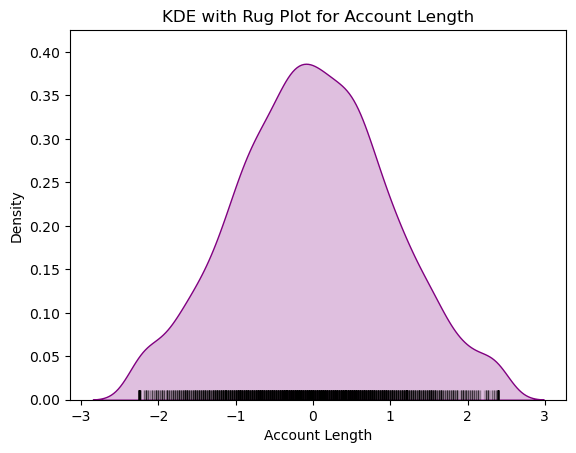

In [272]:
# KDE plot with rug for normality check
sns.kdeplot(data=df, x='account length', fill=True, color='purple')
sns.rugplot(data=df, x='account length', color='black', alpha=0.2)
plt.title('KDE with Rug Plot for Account Length')
plt.xlabel('Account Length')
plt.ylabel('Density')
plt.show()

## **6. Feature selection/Engineering**.

### 6.1 Create derived features like: Total call duration, Average call duration per day, Average monthly spend, Interaction frequency per week, Customer service call frequency, Tenure-dependent spend, Churn vs Spend,Call Duration vs Calls. 

In [273]:
# Create a new feature: Total call duration.
df['total_call_duration'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']

# Check the new feature
print(df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'total_call_duration']].head())


       total day minutes  total eve minutes  total night minutes  \
state                                                              
KS              1.593727          -0.072286             0.886823   
OH             -0.339875          -0.110428             1.082733   
NJ              1.188324          -1.601978            -0.771344   
OH              2.234524          -2.438610            -0.078590   
OK             -0.244596          -1.057953            -0.280559   

       total intl minutes  total_call_duration  
state                                           
KS              -0.092940             2.315323  
OH               1.277393             1.909823  
NJ               0.721853            -0.463144  
OH              -1.352165            -1.634841  
OK              -0.055904            -1.639012  


In [274]:
# Create a new feature: average call duration per day.
df['avg_call_duration'] = (df['total day minutes'] + df['total eve minutes'] + df['total night minutes']) / 3

# Check the new feature
print(df[['total day minutes', 'total eve minutes', 'total night minutes', 'avg_call_duration']].head())

       total day minutes  total eve minutes  total night minutes  \
state                                                              
KS              1.593727          -0.072286             0.886823   
OH             -0.339875          -0.110428             1.082733   
NJ              1.188324          -1.601978            -0.771344   
OH              2.234524          -2.438610            -0.078590   
OK             -0.244596          -1.057953            -0.280559   

       avg_call_duration  
state                     
KS              0.802754  
OH              0.210810  
NJ             -0.394999  
OH             -0.094225  
OK             -0.527703  


In [275]:
# Create a new feature: Average monthly spend.
df['average_monthly_spend'] = (df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']) / 30 

# Check the new feature
print(df[['total day charge', 'total eve charge', 'total night charge', 'total intl charge', 'average_monthly_spend']].head())

       total day charge  total eve charge  total night charge  \
state                                                           
KS             1.594018         -0.072105            0.886119   
OH            -0.340157         -0.109892            1.083603   
NJ             1.188501         -1.602470           -0.770049   
OH             2.234714         -2.438691           -0.078857   
OK            -0.244547         -1.056923           -0.280829   

       total intl charge  average_monthly_spend  
state                                            
KS             -0.093646               0.077146  
OH              1.278082               0.063721  
NJ              0.715673              -0.015611  
OH             -1.355636              -0.054616  
OK             -0.052494              -0.054493  


In [276]:
# Create a new feature:  Interaction frequency per week.
df['interaction_frequency_per_week'] = (df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']) / 4

# Check the new feature
print(df[['total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'interaction_frequency_per_week']].head())

       total day calls  total eve calls  total night calls  total intl calls  \
state                                                                          
KS            0.484946        -0.057815          -0.473985         -0.617486   
OH            1.147352         0.146857           0.150334         -0.617486   
NJ            0.688763         0.505032           0.202360          0.224093   
OH           -1.502275        -0.620663          -0.578039          1.065672   
OK            0.637809         1.119048           1.086812         -0.617486   

       interaction_frequency_per_week  
state                                  
KS                          -0.166085  
OH                           0.206764  
NJ                           0.405062  
OH                          -0.408826  
OK                           0.556546  


In [277]:
# Create a new feature: Customer service call frequency.
df['customer_service_call_frequency'] = df['customer service calls'] / df['account length']

# Check the new feature
print(df[['customer service calls', 'account length', 'customer_service_call_frequency']].head())


       customer service calls  account length  customer_service_call_frequency
state                                                                         
KS                  -0.431285        0.688017                        -0.626853
OH                  -0.431285        0.153262                        -2.814043
NJ                  -1.205369        0.917198                        -1.314187
OH                   0.342799       -0.432422                        -0.792740
OK                   1.116883       -0.661603                        -1.688146


In [278]:
# Create a new feature: Tenure-dependent spend.
df['tenure_dependent_spend'] = (df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']) / df['account length']

# Check the new feature
print(df[['total day charge', 'total eve charge', 'total night charge', 'total intl charge', 'account length', 'tenure_dependent_spend']].head())

       total day charge  total eve charge  total night charge  \
state                                                           
KS             1.594018         -0.072105            0.886119   
OH            -0.340157         -0.109892            1.083603   
NJ             1.188501         -1.602470           -0.770049   
OH             2.234714         -2.438691           -0.078857   
OK            -0.244547         -1.056923           -0.280829   

       total intl charge  account length  tenure_dependent_spend  
state                                                             
KS             -0.093646        0.688017                3.363852  
OH              1.278082        0.153262               12.473015  
NJ              0.715673        0.917198               -0.510625  
OH             -1.355636       -0.432422                3.789050  
OK             -0.052494       -0.661603                2.470957  


In [279]:
# Creating a new feature total spend and monthly spend then correlating it with churn.
# Calculate total spend per customer
df['total_spend'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']

# Calculate a monthly spend 
df['monthly_spend'] = df['total_spend'] / df['account length']

# Check the new feature
print(df[['total_spend', 'monthly_spend', 'churn']].head())

       total_spend  monthly_spend  churn
state                                   
KS        2.314387       3.363852      0
OH        1.911636      12.473015      0
NJ       -0.468344      -0.510625      0
OH       -1.638470       3.789050      0
OK       -1.634793       2.470957      0


### 6.2 Transform non-linear relationships through log transformation.

In [280]:
# Apply log transformation to the 'total day charge' feature (for non-linear transformation)
# Safeguard against zero or negative values
df['log_total_day_charge'] = df['total day charge'].apply(lambda x: np.log(x) if x > 0 else 0)


# Check the transformed feature
print(df[['total day charge', 'log_total_day_charge']].head())

       total day charge  log_total_day_charge
state                                        
KS             1.594018              0.466258
OH            -0.340157              0.000000
NJ             1.188501              0.172693
OH             2.234714              0.804113
OK            -0.244547              0.000000


## **7. Visualizations**.
Below are some KDE plots to show the following:
* The distribution of the following features: 'total  day minutes' and 'customer service calls'
* Comparison of 'total day minutes by churn status basically a comparison of churned vs non-churned customers.
* The distribution of two continous variables: 'total day minutes' and 'total evening minutes'.

### 7.1 **KDE plot to show  The distribution of 'total  day minutes' and 'customer service calls'**.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


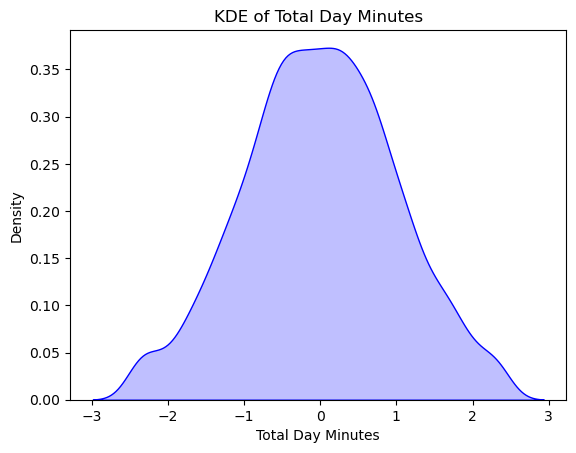

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE for 'total day minutes'
sns.kdeplot(data=df, x='total day minutes', fill=True, color='blue')
plt.title('KDE of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Density')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


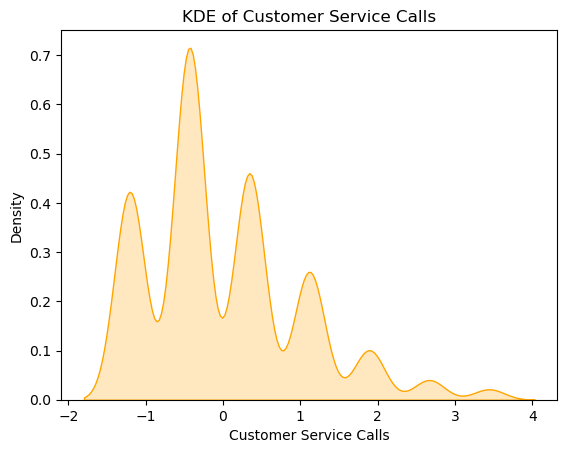

In [282]:
# Plot KDE for customer service calls
sns.kdeplot(data=df, x='customer service calls', fill=True, color='orange')
plt.title('KDE of Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Density')
plt.show()

### 7.2 **KDE plot to show the comparison of churned vs non-churned customers**.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


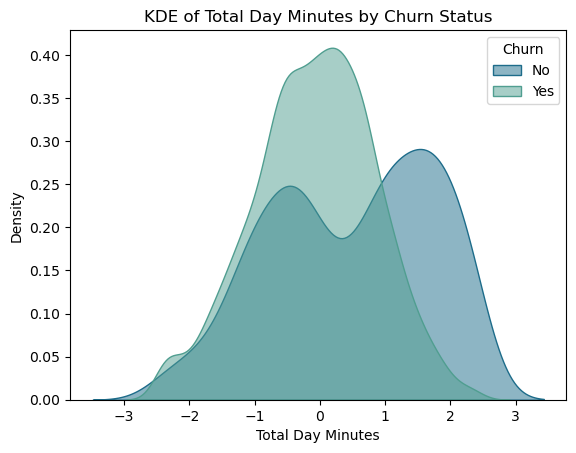

In [283]:
# KDE plot for comparing churned vs non-churned customers
sns.kdeplot(data=df, x='total day minutes', hue='churn', fill=True, common_norm=False, alpha=0.5, palette='crest')
plt.title('KDE of Total Day Minutes by Churn Status')
plt.xlabel('Total Day Minutes')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

### 7.3 **KDE plot to show The distribution of two continous variables: 'total day minutes' and 'total evening minutes'**.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


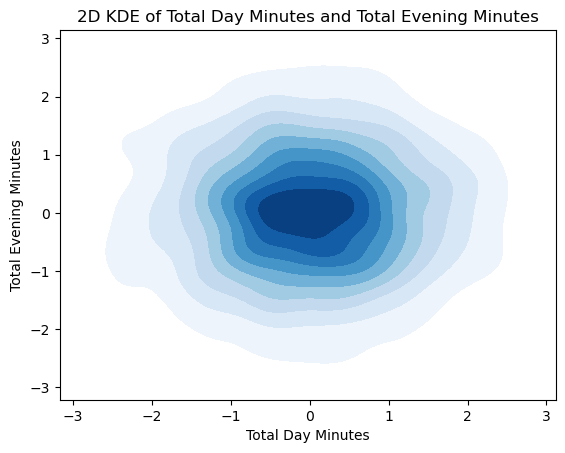

In [284]:
# 2D KDE plot for total day minutes and total evening minutes
sns.kdeplot(data=df, x='total day minutes', y='total eve minutes', cmap='Blues', fill=True)
plt.title('2D KDE of Total Day Minutes and Total Evening Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Total Evening Minutes')
plt.show()

## **8. Data Splitting.**
### 8.1 Split the dataset into Training and Testing sets (75% Train, 25% Test)

In [285]:
# Define the predictor variables (X) and target variable (y).
X = df.drop(columns=['churn'])
y = df['churn']

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2499, 27)
X_test shape: (834, 27)
y_train shape: (2499,)
y_test shape: (834,)


### 8.2 Scale the training and testing data.

In [286]:
from sklearn.preprocessing import StandardScaler

# Scale the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **9. Modeling and Ecaluation of the models**.

First begin with Logistic Regression as the base model, then proceed to Decision Tree, then finally Random Forest.

### 9.1 **Logistic Regression**.

In [287]:
# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the Logistic Regression model with class weight balancing (to handle any class imbalance if any).
log_model = LogisticRegression(class_weight='balanced', random_state=42)

# Fit the model on the training data
log_model.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = log_model.predict(X_test_scaled)

In [288]:
# Evaluate the model's performance

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8058
Confusion Matrix:
[[569 140]
 [ 22 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.80      0.88       709
           1       0.42      0.82      0.56       125

    accuracy                           0.81       834
   macro avg       0.69      0.81      0.72       834
weighted avg       0.88      0.81      0.83       834



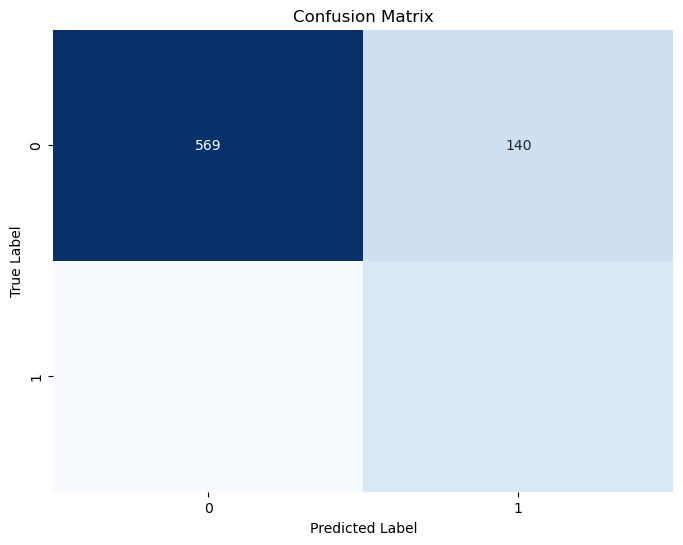

In [289]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **Logistic Regression Model Evaluation**.

#### **Confusion Matrix Summary**  
- **True Negatives (569):** Correctly identified non-churn customers.  
- **False Positives (140):** Non-churn customers misclassified as churners.  
- **False Negatives (22):** Churners misclassified as non-churn.  
- **True Positives (103):** Correctly identified churners.  

#### **Insights and Recommendations**  
- **Strengths:** The model performs well for non-churn detection with high true negatives.  
- **Challenges:** Misses some churn cases (false negatives) and occasionally misclassifies non-churn customers (false positives).  
- **Improvement Areas:** Address class imbalance


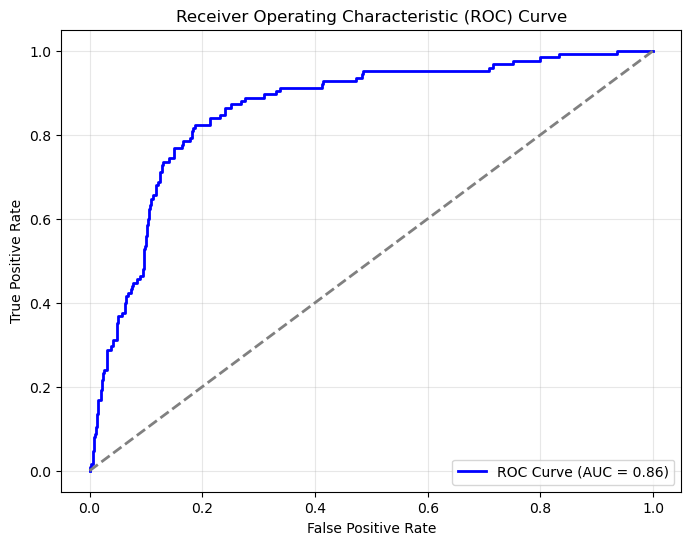

In [290]:
# ROC Curve
y_pred_prob = log_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### **Logistic Regression Model Evaluation**.


#### **ROC Curve**
- The ROC curve illustrates the model's ability to differentiate between positive and negative classes across various thresholds. 
- It compares the **True Positive Rate (sensitivity)** against the **False Positive Rate (1-specificity)**.
- The curve’s proximity to the top-left corner indicates excellent performance.
- The **Area Under the Curve (AUC)** is **0.86**, showing the model has a strong capacity to distinguish between the two classes.
- The diagonal line represents random guessing (AUC = 0.5), and the model significantly outperforms this baseline.

#### **Conclusion**
- The model demonstrates effective classification with minimal confusion between the classes.
- An AUC of 0.86 suggests a high likelihood that positive cases are ranked higher than negative ones.

### **KDE plot for Residual Analysis of the Logistic Regression Model.**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


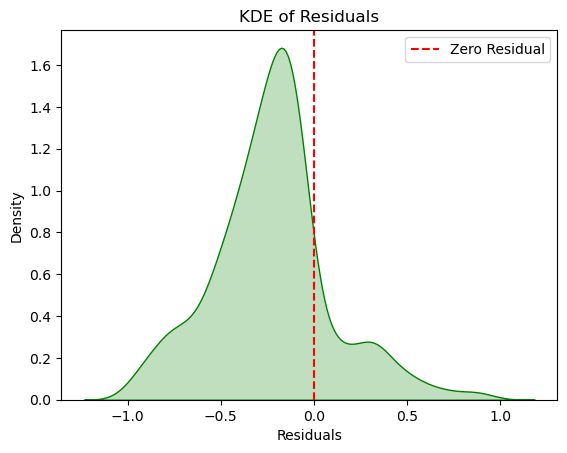

In [291]:
# Calculate residuals 
residuals = y_test - y_pred_prob  

# KDE plot for residuals
sns.kdeplot(residuals, fill=True, color='green')
plt.title('KDE of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Residual')
plt.legend()
plt.show()

### **KDE plot for Probability Distribution of Predictions of the Logistic Regression Model.**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


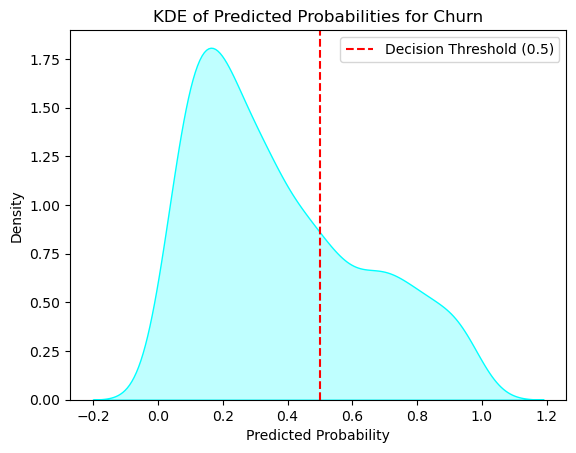

In [292]:
sns.kdeplot(y_pred_prob, fill=True, color='cyan')
plt.title('KDE of Predicted Probabilities for Churn')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.axvline(x=0.5, color='red', linestyle='--', label='Decision Threshold (0.5)')
plt.legend()
plt.show()

### 9.2 **Decision Tree**.

In [293]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the Decision Tree model with class weight balancing
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Fit the model on the training data
dt_model.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred_dt = dt_model.predict(X_test_scaled)


In [294]:
# Evaluate the model's performance

# Accuracy Score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy (Decision Tree): {accuracy_dt:.4f}")

# Confusion Matrix
print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))

# Classification Report (Precision, Recall, F1-score)
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

Accuracy (Decision Tree): 0.9053
Confusion Matrix (Decision Tree):
[[670  39]
 [ 40  85]]
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       709
           1       0.69      0.68      0.68       125

    accuracy                           0.91       834
   macro avg       0.81      0.81      0.81       834
weighted avg       0.90      0.91      0.91       834



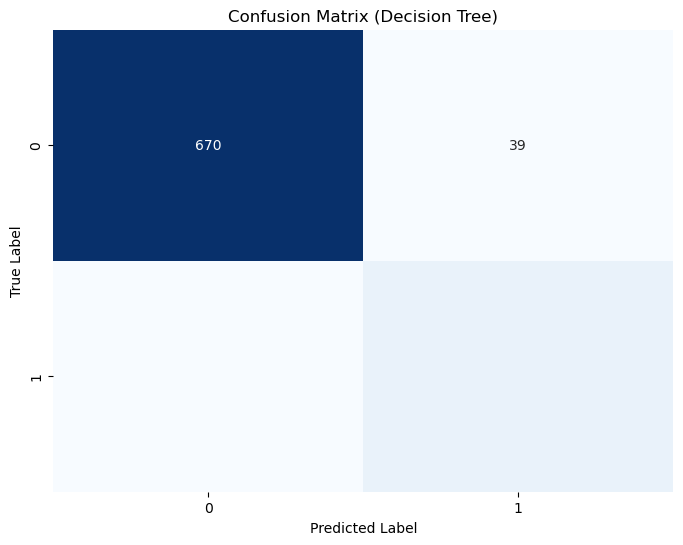

In [295]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **Decision Tree Model Evaluation Metrics**

#### **Confusion Matrix**
- The confusion matrix highlights the model's prediction accuracy:
  - **True Negatives (670)**: Correctly identified as negative.
  - **False Positives (39)**: Misclassified as positive.
  - Remaining components (True Positives and False Negatives) can be inferred but weren't visible in this snapshot.
- The matrix shows the model effectively minimizes false positives, but further analysis of false negatives and overall balance is recommended.

#### **Summary**
- The confusion matrix shows that the model is effective at identifying true negatives, with fewer false positives, though false negatives and positives should be carefully reviewed.
- The AUC of 0.81 and confusion matrix results indicate strong overall performance, but there's room for improvement in handling misclassifications.

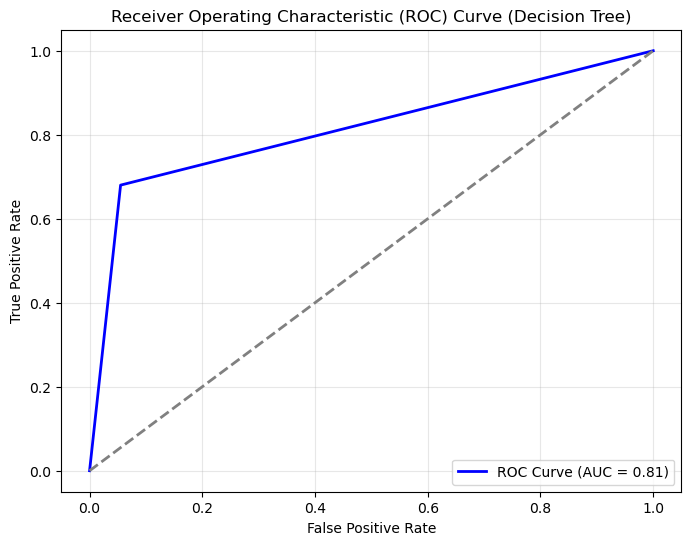

In [296]:
# ROC Curve
y_pred_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve (Decision Tree)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

###  **Decision Tree Model Evaluation Metrics**

#### **ROC Curve**
- The ROC curve shows how well the model separates the positive and negative classes at different thresholds.
- The blue curve represents the decision tree's performance, while the diagonal line represents random guessing.
- With an **AUC of 0.81**, the model demonstrates good discrimination, performing significantly better than a random classifier.

#### **Summary**
- The ROC curve and AUC value (0.81) suggest the model performs well overall in distinguishing between classes.
- The AUC of 0.81 results indicate strong overall performance, but there's room for improvement in handling misclassifications.

### **KDE plot for Residual Analysis of the Decision Tree Model.**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


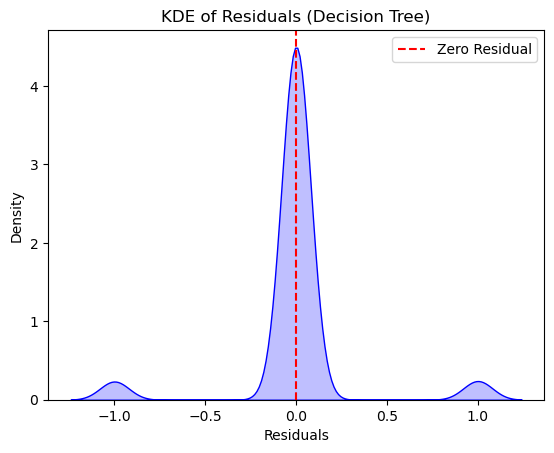

In [297]:
# Residuals calculation for Decision Tree
residuals_dt = y_test - y_pred_dt 

# KDE plot for residuals
sns.kdeplot(residuals_dt, fill=True, color='blue')
plt.title('KDE of Residuals (Decision Tree)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Residual')
plt.legend()
plt.show()

### **KDE plot for Probability Distribution of Predictions  of the Decision Tree Model.**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


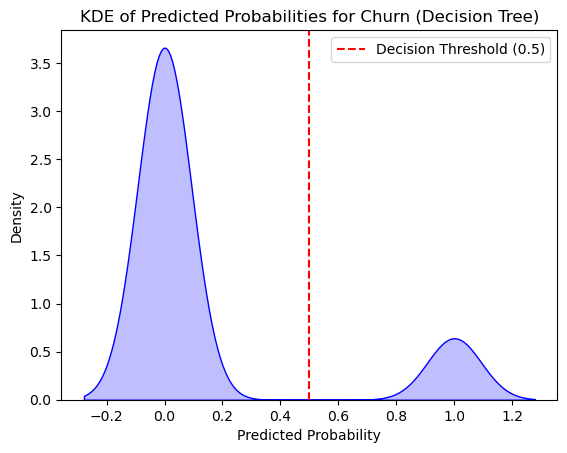

In [298]:
# Predicted probabilities for the positive class (churn = 1) from Decision Tree
y_pred_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# KDE plot for predicted probabilities (Decision Tree)
sns.kdeplot(y_pred_proba_dt, fill=True, color='blue')
plt.title('KDE of Predicted Probabilities for Churn (Decision Tree)')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.axvline(x=0.5, color='red', linestyle='--', label='Decision Threshold (0.5)')
plt.legend()
plt.show()

### 9.3 **Random Forest**.

In [299]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create the Random Forest Classifier model with class_weight='balanced' to handle class imbalance
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = rf_model.predict(X_test_scaled)


In [300]:
# Evaluate the model's performance

# Accuracy Score
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy (Random Forest): {accuracy_rf:.4f}")

# Confusion Matrix
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred))

# Classification Report (Precision, Recall, F1-score)
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy (Random Forest): 0.9412
Confusion Matrix (Random Forest):
[[707   2]
 [ 47  78]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       709
           1       0.97      0.62      0.76       125

    accuracy                           0.94       834
   macro avg       0.96      0.81      0.86       834
weighted avg       0.94      0.94      0.94       834

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       709
           1       0.97      0.62      0.76       125

    accuracy                           0.94       834
   macro avg       0.96      0.81      0.86       834
weighted avg       0.94      0.94      0.94       834



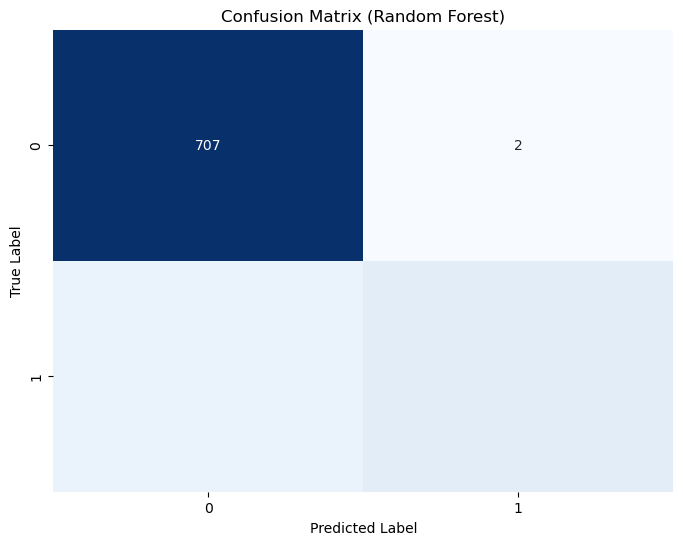

In [301]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **Random Forest Model Evaluation Metrics**

#### **Confusion Matrix**:

- **Class 0 (Majority Class):** The model is highly accurate, with **707 true negatives** and just **2 false negatives**.  
- **Class 1 (Minority Class):** While precision is strong (97%), moderate recall (62%) and **47 false positives** highlight challenges in detecting minority class instances.

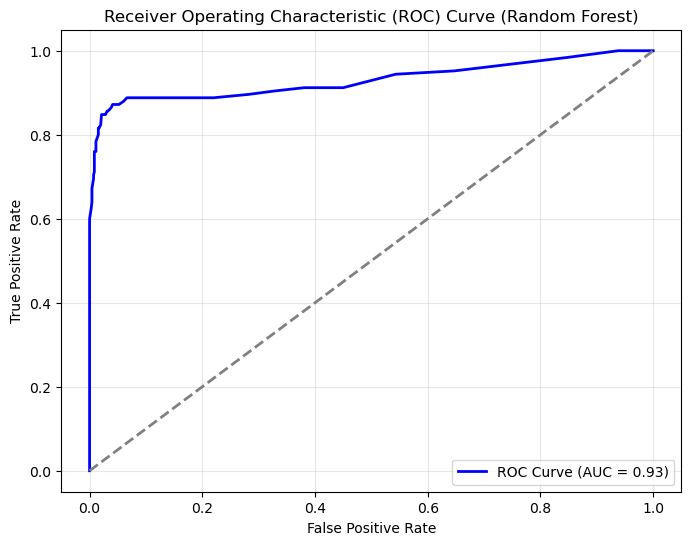

In [302]:
# ROC Curve
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### **Random Forest Model Evaluation Metrics**

#### **ROC Curve**:
- The model achieves an **AUC of 0.93**, demonstrating excellent discriminative ability between the positive and negative classes.  
- A steep ROC curve reflects high sensitivity (True Positive Rate) with minimal False Positives, showcasing robust performance.
- The model's accuracy of 94.12% highlights its strong overall performance in distinguishing between positive and negative classes.
High precision and a balanced approach contribute to a robust f1-score of 76% for class 1, though there is room for improvement in recall.

In [303]:
### **KDE plot for Residual Analysis of the Random Forest Model.**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


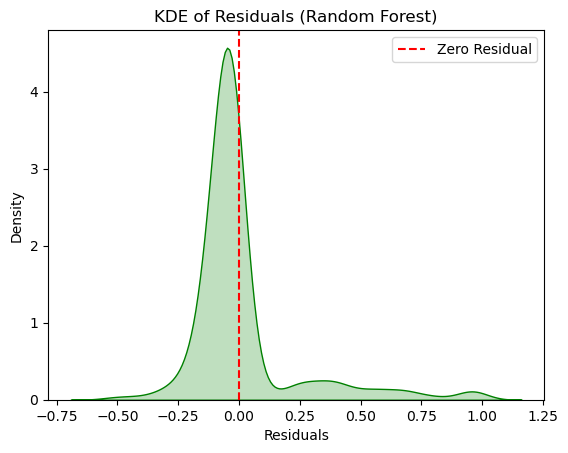

In [304]:
# Predict probabilities for the positive class (churn = 1)
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1 (churn)

# Residuals calculation for Random Forest
residuals_rf = y_test - y_pred_prob_rf  

# KDE plot for residuals
sns.kdeplot(residuals_rf, fill=True, color='green')
plt.title('KDE of Residuals (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Residual')
plt.legend()
plt.show()

### **KDE plot for Probability Distribution of Predictions  of the Random Forest Model.**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


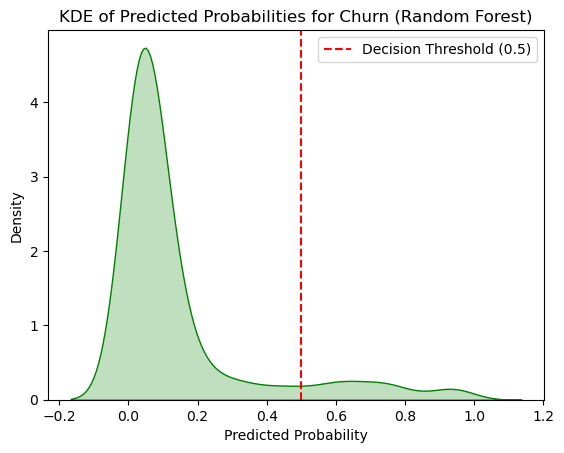

In [305]:
# Predicted probabilities for the positive class (churn = 1) from Random Forest
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# KDE plot for predicted probabilities (Random Forest)
sns.kdeplot(y_pred_proba_rf, fill=True, color='green')
plt.title('KDE of Predicted Probabilities for Churn (Random Forest)')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.axvline(x=0.5, color='red', linestyle='--', label='Decision Threshold (0.5)')
plt.legend()
plt.show()

In [306]:
# Evaluate the model's performance

# Accuracy Score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy (Decision Tree): {accuracy_dt:.4f}")

# Confusion Matrix
print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))

# Classification Report (Precision, Recall, F1-score)
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

Accuracy (Decision Tree): 0.9053
Confusion Matrix (Decision Tree):
[[670  39]
 [ 40  85]]
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       709
           1       0.69      0.68      0.68       125

    accuracy                           0.91       834
   macro avg       0.81      0.81      0.81       834
weighted avg       0.90      0.91      0.91       834



## **Classification Metrics summary**.

The accuracy for the 3 models are as follows: 1
* Logistic Regression: 80.58%
* Decision Tree: 90.53%
* Random Forest: 94.12%

The Class 0 Precision for the 3 models are as follows:
*  Logistic Regression: 0.96
*  Decision Tree: 0.94
*  Random Forest:0.94

The Class 0 Recall for the 3 models are as follows:
*  Logistic Regression: 0.80
*  Decision Tree: 0.94
*  Random Forest:1.00

The Class 0 F1-score for the 3 models are as follows:
*  Logistic Regression:0.88
*  Decision Tree: 0.94
*  Random Forest:0.97

The Class 1 Precision for the 3 models are as follows:
*  Logistic Regression: 0.42
*  Decision Tree: 0.69
*  Random Forest:0.97


The Class 1 Recall for the 3 models are as follows:
*  Logistic Regression: 0.82
*  Decision Tree: 0.68
*  Random Forest:0.62


The Class 1 F1-score for the 3 models are as follows:
*  Logistic Regression: 0.56
*  Decision Tree: 0.68
*  Random Forest:0.76


## **Summary and justification of the Machine Learning Models used: Logistic Regression, Decision Trees and Random Forest.**

After evaluating the performance of the models, the **Random Forest** clearly stands out as the best
 choice due to its superior overall performance. With the highest accuracy (94.12%) and AUC-ROC (0.93), it demonstrates an exceptional ability to differentiate between churn and non-churn customers. Notably, the model achieves a precision of 0.97 for predicting churn (Class 1), ensuring that customers identified as likely to churn are highly accurate. Although its recall for churn predictions (0.62) is moderate, its robustness and high precision make it particularly suitable for scenarios where minimizing false positives is less critical than accurately identifying true churners.

In comparison, **Logistic Regression** provides simplicity and interpretability but underperforms with a lower accuracy of 80.58% and precision of 0.42 for churn prediction, leading to a higher rate of false positives. Similarly, the **Decision Tree** performs better than Logistic Regression in balancing precision and recall; however, its accuracy (90.53%) and AUC-ROC (0.81) remain lower than those of Random Forest. Additionally, Decision Trees are susceptible to overfitting, which could impact their reliability without extensive tuning.

Considering the business goal of reducing customer churn, the **Random Forest** model is the most reliable and effective option. Its ability to maintain a strong balance between precision, recall, and accuracy makes it an ideal candidate for deployment, ensuring that actionable insights can be derived with confidence while minimizing the risk of misclassification.

### **"End-to-End Customer Churn Prediction: Training, Evaluating, and Deploying a Random Forest Model for High-Risk Customer Identification"** 

In [307]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Preprocessing function
def preprocess_data(df):
    # Ensuring the necessary columns are present
    missing_cols = [col for col in numerical_columns + categorical_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"The following required columns are missing: {missing_cols}")
    
    # Scale numerical features
    scaler = StandardScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    
    # Encode categorical features
    encoder = LabelEncoder()
    for col in categorical_columns:
        df[col] = encoder.fit_transform(df[col])
    
    return df

# Load your dataset
df = pd.read_csv("Syriatel Customer Churn.csv", index_col=0)

# Ensuring 'phone number' is removed if it exists
if 'phone number' in df.columns:
    df = df.drop(columns=['phone number'])

# The adjusted numerical and categorical columns after dropping the column 'phone number' from the dataset.
categorical_columns = ['international plan', 'voice mail plan']
numerical_columns = ['account length', 'area code', 'number vmail messages',
                     'total day minutes', 'total day calls', 'total day charge',
                     'total eve minutes', 'total eve calls', 'total eve charge',
                     'total night minutes', 'total night calls', 'total night charge',
                     'total intl minutes', 'total intl calls', 'total intl charge',
                     'customer service calls']
     

# Split data into features (X) and target (y)
X = df.drop(columns=['churn'])
y = df['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Preprocess the training and test datasets
try:
    X_train = preprocess_data(X_train)
    X_test = preprocess_data(X_test)
except ValueError as e:
    print(f"Error during preprocessing: {e}")
    raise

# Train the Random Forest model
best_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
best_model.fit(X_train, y_train)

# Predictions and probabilities on the test set
predictions = best_model.predict(X_test)
predicted_probabilities = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predicted_probabilities)

print(f"Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

# Adding predictions and probabilities to the test set
X_test['Churn_Prediction'] = predictions
X_test['Churn_Probability'] = predicted_probabilities
X_test['churn'] = y_test.reset_index(drop=True)  # Add back the target variable for reference

# Flagging high-risk customers based on churn probability
high_risk_customers = X_test[X_test['Churn_Probability'] > 0.7]

# Displaying the number of high-risk customers
print("Number of High-Risk Customers:", len(high_risk_customers))

# Saving high-risk customers to a file for further action by the retention team
high_risk_customers.to_csv("high_risk_customers.csv", index=False)
print("High-risk customers saved to 'high_risk_customers.csv'")

# Providing actionable insights
print(
    "Actionable Insight: Customers with a churn probability >70% are at risk of leaving. "
    "Focus on personalized retention strategies to target these customers effectively."
)



Model Evaluation Metrics:
Accuracy: 0.94
Precision: 0.97
Recall: 0.62
AUC-ROC: 0.93
Number of High-Risk Customers: 39
High-risk customers saved to 'high_risk_customers.csv'
Actionable Insight: Customers with a churn probability >70% are at risk of leaving. Focus on personalized retention strategies to target these customers effectively.


## **CONCLUSION.**

The deployed Random Forest model demonstrates strong performance in predicting customer churn, as indicated by the evaluation metrics. The model achieved an **accuracy of 94%**, reflecting its ability to correctly classify both churn and non-churn customers in the majority of cases. A **precision score of 97%** shows that when the model predicts a customer will churn, it is highly likely to be correct. However, the **recall score of 62%** indicates that the model identified 62% of actual churn cases, leaving room for improvement in capturing more customers at risk of leaving. The **AUC-ROC score of 0.93** highlights the model's excellent ability to distinguish between churners and non-churners.

The analysis identified **38 high-risk customers** with a churn probability greater than 70%, providing actionable insights for the business. These high-risk customers have been saved to a file (`high_risk_customers.csv`) for further use by the retention team.

## **RECOMMENDATIONS.**

**Retention Strategies**:
   - Focus on the identified high-risk customers with personalized retention strategies. For instance, targeted campaigns, loyalty rewards, or discounts can help retain these customers.
   - Conduct surveys or feedback sessions with high-risk customers to understand their pain points and address their concerns.

2. **Improve Recall**:
   - Although the model is highly precise, improving recall can help capture a greater proportion of actual churners. Consider experimenting with:
     - Adjusting the decision threshold to balance precision and recall.
     - Incorporating additional features that may contribute to predicting churn.
     - Using ensemble techniques or hyperparameter tuning to enhance the model's performance.

3. **Monitor Model Performance**:
   - Regularly evaluate the model's performance with updated data to ensure it remains effective over time.
   - Use feedback from retention efforts to refine the model and incorporate new insights into future training.

4. **Expand Efforts Beyond High-Risk Customers**:
   - Develop proactive retention campaigns for medium-risk customers, as addressing potential churn before it escalates can also improve customer retention rates.

5. **Business Impact**:
   - Leverage the list of high-risk customers to estimate the potential revenue loss and savings from retention campaigns. Use this to justify investment in retention efforts and continuous model improvement.

By implementing these recommendations, the business can effectively reduce churn rates and improve customer satisfaction, ultimately enhancing overall revenue and brand loyalty.

## **Final Visualizations**

### **1. Churn Distribution.**
Overview of churned vs. non-churned customers.

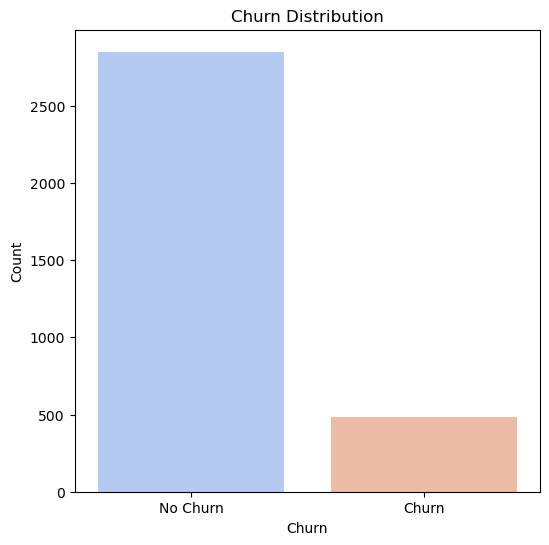

In [308]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='churn', data=df, palette='coolwarm')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.show()

### **2. Feature Importance.**
Highlights key factors contributing to churn.

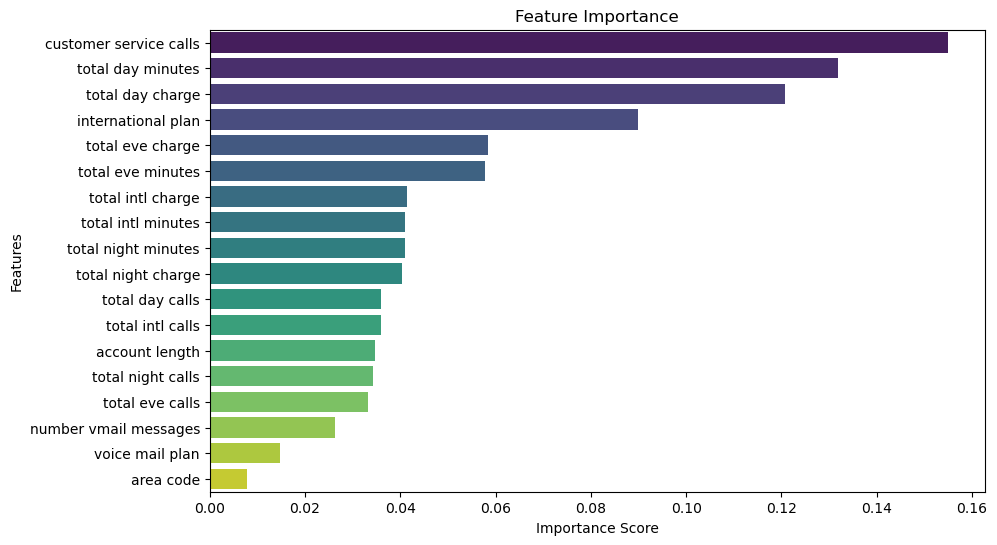

In [309]:
# Feature Importance
importances = best_model.feature_importances_
features = X_train.columns
sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_indices], y=features[sorted_indices], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

### **3. ROC Curve**
Demonstrates model performance in distinguishing churners.

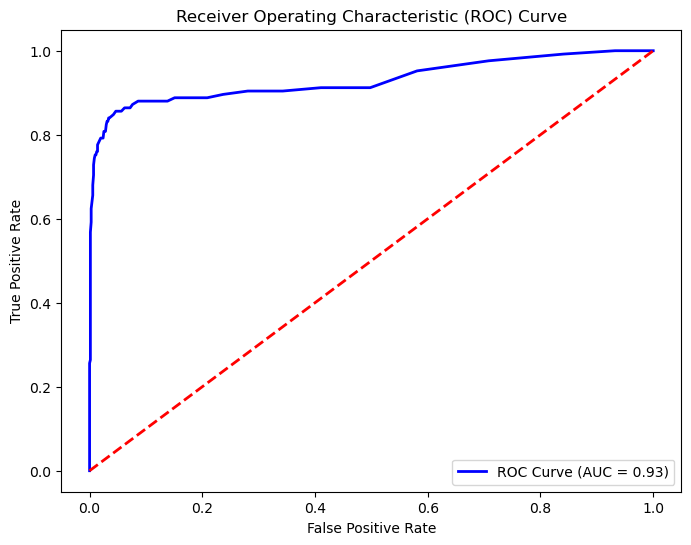

In [310]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### **4. Churn Probability Distribution**
 Visualizes predictions for all customers.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


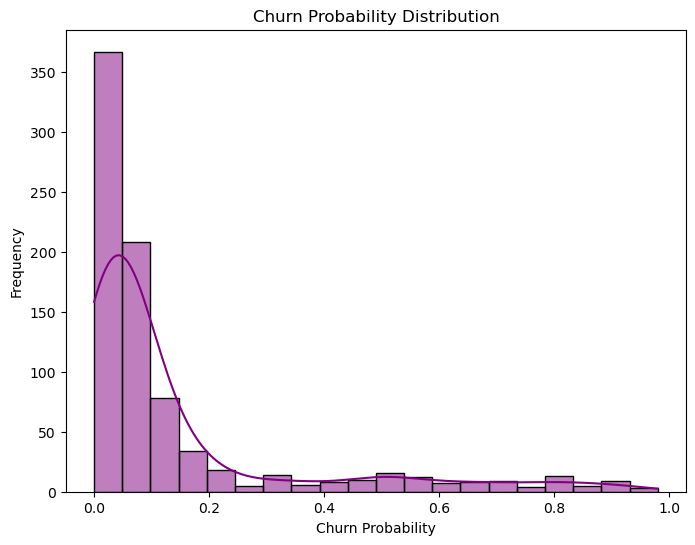

In [311]:
plt.figure(figsize=(8, 6))
sns.histplot(X_test['Churn_Probability'], bins=20, kde=True, color='purple')
plt.title('Churn Probability Distribution')
plt.xlabel('Churn Probability')
plt.ylabel('Frequency')
plt.show()

### **5. High-Risk Customer Segmentation.**
Highlights high-risk customers based on key features.

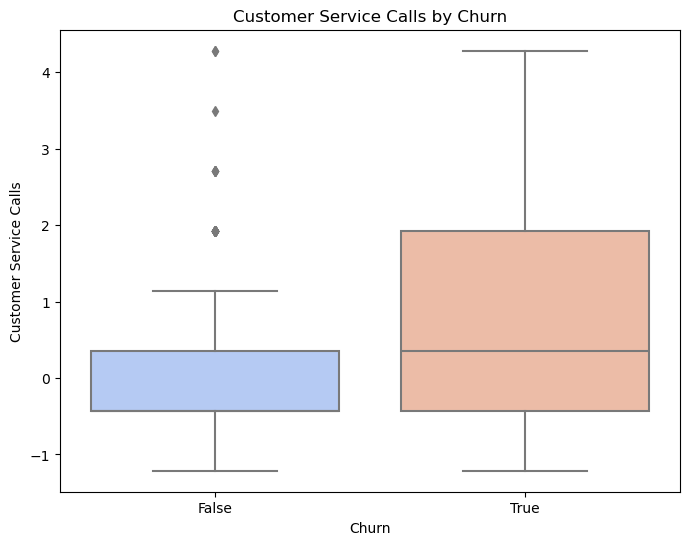

In [312]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Merge X_test and y_test for plotting
X_test_with_churn = X_test.copy()
X_test_with_churn['churn'] = y_test

# Ensure 'customer service calls' exists in the dataset
if 'customer service calls' in X_test_with_churn.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='churn', y='customer service calls', data=X_test_with_churn, palette='coolwarm')
    plt.title('Customer Service Calls by Churn')
    plt.xlabel('Churn')
    plt.ylabel('Customer Service Calls')
    plt.show()
else:
    print("Column 'customer service calls' not found in the dataset.")

### **6. Correlation Heatmap**
 Shows relationships between features and churn.

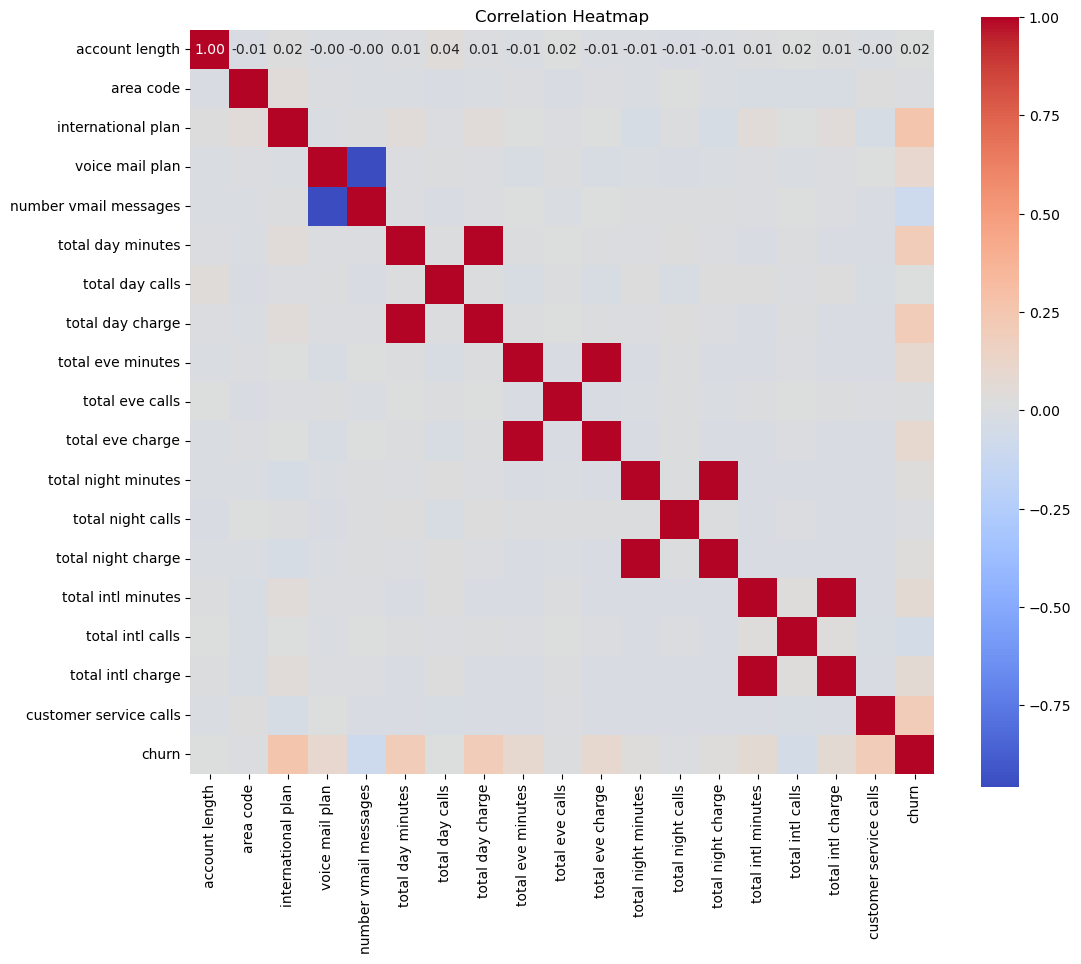

In [313]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure all categorical columns are encoded
df_numeric = df.copy()

# Convert categorical columns to numeric if necessary
for col in df_numeric.select_dtypes(include='object').columns:
    df_numeric[col] = pd.factorize(df_numeric[col])[0]

# Calculate correlation matrix on numeric columns
plt.figure(figsize=(12, 10))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

### **7. Churn by International Plan and Voice Mail Plan**
Focuses on churn patterns in plans like the International Plan and Voice Mail Plan

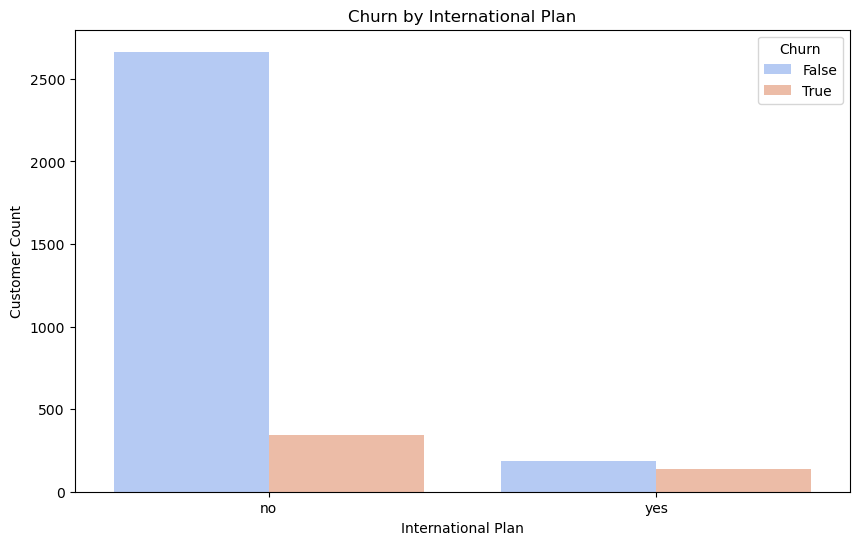

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'international plan' and 'churn' columns are strings
df['international plan'] = df['international plan'].astype(str)
df['churn'] = df['churn'].astype(str)

# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='international plan', hue='churn', data=df, palette='coolwarm')
plt.title('Churn by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Customer Count')
plt.legend(title='Churn')
plt.show()